In [9]:
import pickle as pkl
import numpy as np
with open('data/filtered_annotations.pkl', 'rb') as file:
    annotations = pkl.load(file)

In [3]:
import matplotlib.pyplot as plt

def draw_go_board(b_board, w_board):
    # create a 8" x 8" board
    fig = plt.figure(figsize=[8,8])
    fig.patch.set_facecolor((1,1,.8))
    ax = fig.add_subplot(111)

    # draw the grid
    for x in range(19):
        ax.plot([x, x], [0,18], 'k')
    for y in range(19):
        ax.plot([0, 18], [y,y], 'k')

    # scale the axis area to fill the whole figure
    ax.set_position([0,0,1,1])

    # get rid of axes and everything (the figure background will show through)
    ax.set_axis_off()

    # scale the plot area conveniently (the board is in 0,0..18,18)
    ax.set_xlim(-1,19)
    ax.set_ylim(-1,19)

    # draw Go stones at (10,10) and (13,16)
    def draw_stone(row, col, color):
        if color == 'b':
            ax.plot(row,col,'o',markersize=25, markeredgecolor=(0,0,0), markerfacecolor='k', markeredgewidth=2)
        elif color == 'w':
            ax.plot(row,col,'o',markersize=25, markeredgecolor=(.5,.5,.5), markerfacecolor='w', markeredgewidth=2)

    for i in range(len(b_board)):
        for j in range(len(b_board[0])):
            if b_board[i][j]:
                draw_stone(i, j, 'b')
            if w_board[i][j]:
                draw_stone(i, j, 'w')
    return ax

In [4]:
def draw_feat_map(feat, color, ax):
    for r in range(19):
        for c in range(19):
            if feat[r][c]:
                ax.plot(r, c, 'X', markersize=10, markerfacecolor=color)

### simple eye

In [6]:
def eyes(own, opp):
    feat_map = np.zeros(own.shape)
    for r in range(19):
        for c in range(19):
            if (r == 0 or own[r-1][c]) \
                and (r == 18 or own[r+1][c]) \
                and (c == 0 or own[r][c-1]) \
                and (c == 18 or own[r][c+1]) \
                and (not own[r][c] and not opp[r][c]):
                feat_map[r][c] = 1
    return feat_map
        
def opp_eyes(own, opp):
    return eyes(opp, own)

### 4-wall

In [7]:
def walls(own, opp, minlen=4):
    feat_map = np.zeros(own.shape)
    for r in range(19):
        cont = 0
        for c in range(19):
            if own[r][c]:
                cont += 1
            else:
                cont = 0
            if cont == minlen:
                for i in range(minlen):
                    feat_map[r][c-i] = 1
            elif cont > minlen:
                feat_map[r][c] = 1
    for c in range(19):
        cont = 0
        for r in range(19):
            if own[r][c]:
                cont += 1
            else:
                cont = 0
            if cont == minlen:
                for i in range(minlen):
                    feat_map[r-i][c] = 1
            elif cont > minlen:
                feat_map[r][c] = 1
    return feat_map

def opp_walls(own, opp, minlen=4):
    return walls(opp, own, minlen)

alive stones (own/opp), last move, territory if you can figure that out (or just change of ownership)

implement benson's algorithm

IndexError: list index out of range

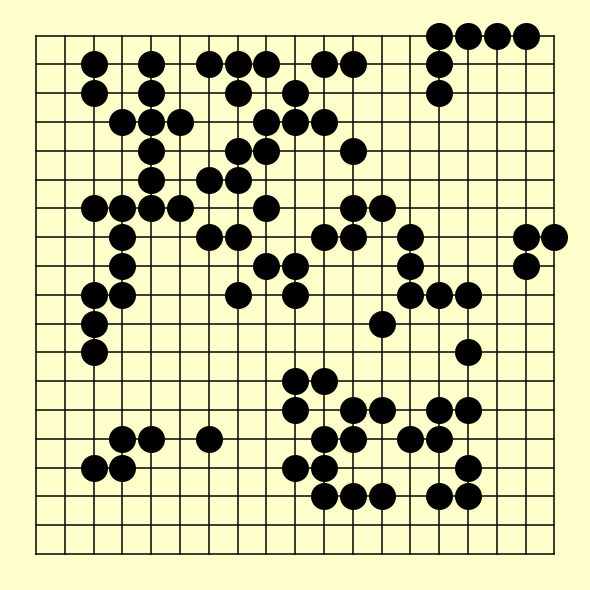

In [31]:
def same_color_region(board, i, j, stone_set, adj_set, marked):
    if marked[i][j] == 1:
        return
    marked[i][j] = 1
    stone_set.add((i, j))
    adj_list = ((i+1, j), (i-1, j), (i, j-1), (i, j+1))
    for adj in adj_list:
        if adj[0] < 0 or adj[0] > 18 or adj[1] < 0 or adj[1] > 18:
            continue
        adj_set.add(adj)
        if board[adj[0]][adj[1]] == board[i][j]:
            same_color_region(board, adj[0], adj[1], stone_set, adj_set, marked)
        
def set_to_feat_map(stone_set):
    feat_map = np.zeros((19, 19))
    for i, j in stone_set:
        feat_map[i][j] = 1
    return feat_map

def benson_alive(board):
    X, R = [], []
    marked = np.zeros((19, 19))
    for i in range(19):
        for j in range(19):
            if marked[i][j]:
                continue
            s, a = set(), set()
            same_color_region(board, i, j, s, a, marked)
            if board[i][j]:
                X.append((s, a))
            else:
                if len(s) < 50:
                    R.append((s, a))
                    
    
    for xi, (x, x_adj) in enumerate(X):
        adj_r_count = 0
        for r, r_adj in R:
            for r, c in x:
                if (r, c) in r_adj:
                    adj_r_count += 1
                    break
        if adj_r_count < 2:
            X.remove()
    return X, R
    
X, R = benson_alive(b_board)
ax = draw_go_board(b_board, np.zeros((19, 19)))
draw_feat_map(set_to_feat_map(R[2][0]), 'r', ax)

In [14]:
s

{(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 10),
 (2, 11),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 18),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 13),
 (3, 14),
 (3, 16),
 (3, 17),
 (3, 18),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 18),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 13),
 (5, 14),
 (5, 16),
 (5, 17),
 (5, 18),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 14),
 (6, 15),
 (6, 16),
 (6, 18),
 (7, 0),
 (

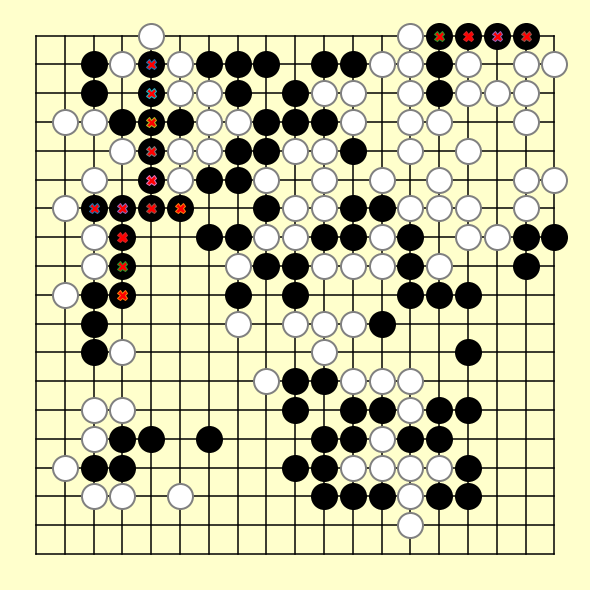

In [10]:
b_board, w_board = annotations[1342]['board_state']
Is = walls(b_board, w_board)
ax = draw_go_board(b_board, w_board)
draw_feat_map(Is, 'r', ax)